<a href="https://colab.research.google.com/github/unnimaya-vu/unnimaya-vu/blob/main/movierating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

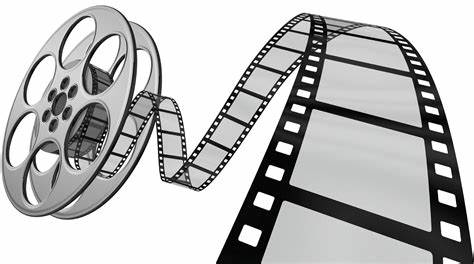

# **Movie Rating system**

This Model is trained with imdb movies in india from the year 1993 to 2021.It predicts the movie rating on the basis of the year,votes,genre,actor and director names in the dataset.Acheived accuracy of 90

Import libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

Read the data

In [114]:
df=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


Explore through data

In [115]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [116]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [117]:
df.shape

(15509, 10)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Checking for null values

In [119]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [120]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [121]:
df['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [122]:
df['Genre'] = df['Genre'].str.split(', ')
#converts each element of the specified columns into a row
df = df.explode('Genre')
df['Genre'].unique()


array(['Drama', 'Musical', 'Comedy', 'Romance', 'War', 'Documentary',
       'Horror', 'Mystery', 'Thriller', 'Action', 'Crime', nan, 'Fantasy',
       'Family', 'Biography', 'History', 'Sport', 'Adventure', 'Sci-Fi',
       'Music', 'Animation', 'News', 'Western', 'Reality-TV', 'Short'],
      dtype=object)

In [123]:
#Dropping null values
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Votes','Duration','Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [124]:
#removing bracket columns
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)
df['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 2008, 1994, 2007, 2003, 1998, 1979,
       1974, 2015, 2006, 1981, 2020, 1985, 2013, 2011, 1988, 1987, 1999,
       1973, 1968, 1982, 1977, 1950, 1969, 1948, 1990, 1989, 2001, 2000,
       1953, 1978, 1963, 1992, 1976, 1984, 1986, 1966, 1975, 1980, 1967,
       1970, 1952, 1972, 1971, 1964, 1954, 1962, 1957, 1965, 1996, 1995,
       1956, 1955, 1936, 1983, 1951, 1961, 1959, 1949, 1960, 1946, 1940,
       1945, 1938, 1941, 1942, 1935, 1937, 1934, 1947, 1931, 1943, 1933,
       1944, 1932, 1939])

In [125]:
df['Votes'].value_counts()

Votes
10       154
9        137
7        134
11       119
13       115
        ... 
894        1
778        1
1,570      1
4,744      1
941        1
Name: count, Length: 2027, dtype: int64

In [126]:
#Replacing , in votes
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
#removing min in duration
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)

In [127]:
# df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+) ')
# df.dropna(subset=['Name'], inplace=True)
df.drop(['Name'], axis = 1, inplace = True)

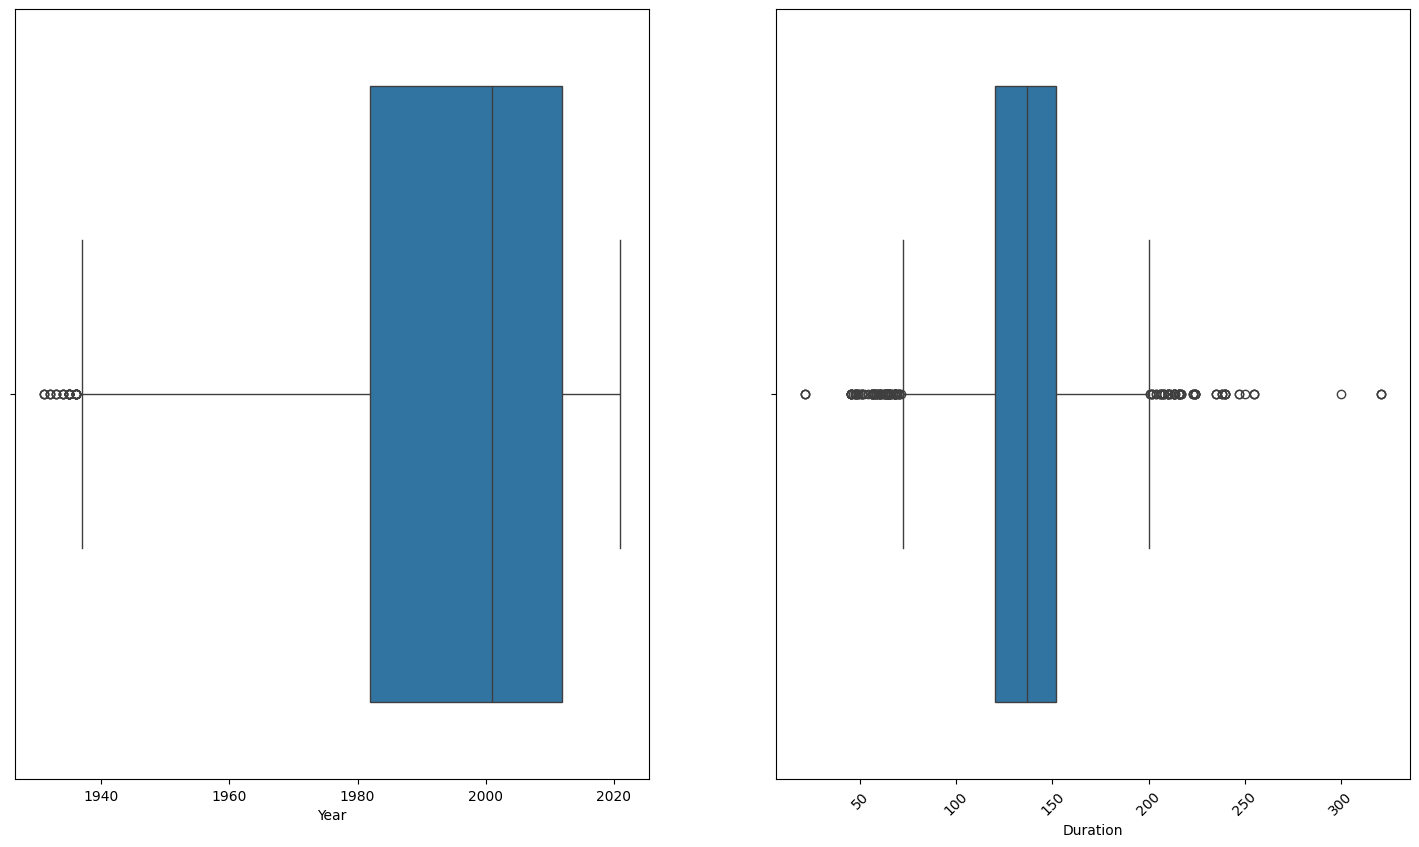

In [128]:
fig,ax=plt.subplots(1,2,figsize=(18,10))
sns.boxplot(x=df['Year'],ax=ax[0])
sns.boxplot(x=df['Duration'],ax=ax[1])
plt.xticks(rotation=45)
plt.show()

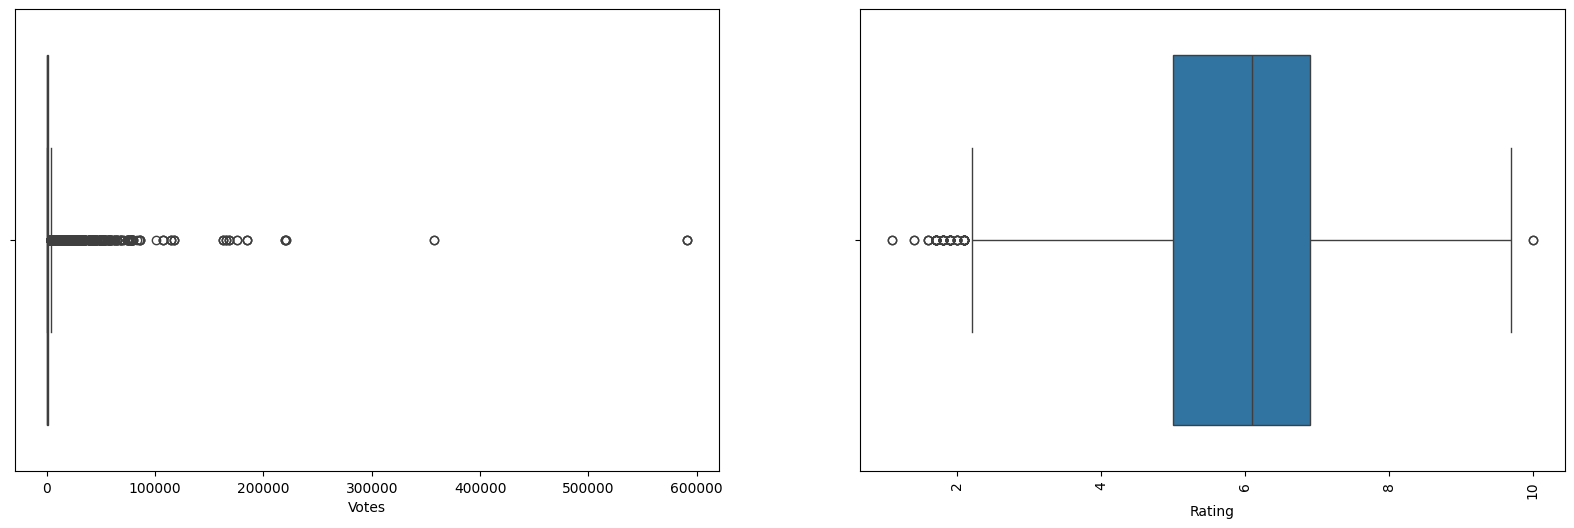

In [129]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x=df['Votes'],ax=ax[0])
sns.boxplot(x=df['Rating'],ax=ax[1])
plt.xticks(rotation=90)
plt.show()

Outliers removal

In [130]:
from scipy import stats
df=df[(np.abs(stats.zscore(df['Votes']))<3)]
df=df[(np.abs(stats.zscore(df['Year']))<3)]
df=df[(np.abs(stats.zscore(df['Duration']))<3)]
df=df[(np.abs(stats.zscore(df['Rating']))<3)]
#Higher deviation means data is more spread out,lower deviation means data is more clusterd together

In [131]:
#replacing null values with the most common rating
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)

In [132]:
#filling missing values
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [133]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...
15503,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [134]:
df.describe()

,Year,Duration,Rating,Votes
count,11707.000000,11707.000000,11707.000000,11707.000000
mean,1995.975228,135.666097,5.863441,2208.674127
std,19.151961,23.450876,1.351043,5561.321564
min,1938.000000,62.000000,1.800000,5.000000
25%,1982.000000,120.000000,5.000000,41.000000
50%,2001.000000,137.000000,6.100000,203.000000
75%,2012.000000,152.000000,6.900000,1334.000000
max,2021.000000,208.000000,9.700000,49164.000000


In [135]:
df.isna().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [136]:
df.dtypes

Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [137]:
numeric_df=df.select_dtypes(include=['number'])
numeric_df.corr()

,Year,Duration,Rating,Votes
Year,1.000000,-0.325285,-0.253323,0.268038
Duration,-0.325285,1.000000,0.029049,0.124435
Rating,-0.253323,0.029049,1.000000,0.200991
Votes,0.268038,0.124435,0.200991,1.000000


Feature selection

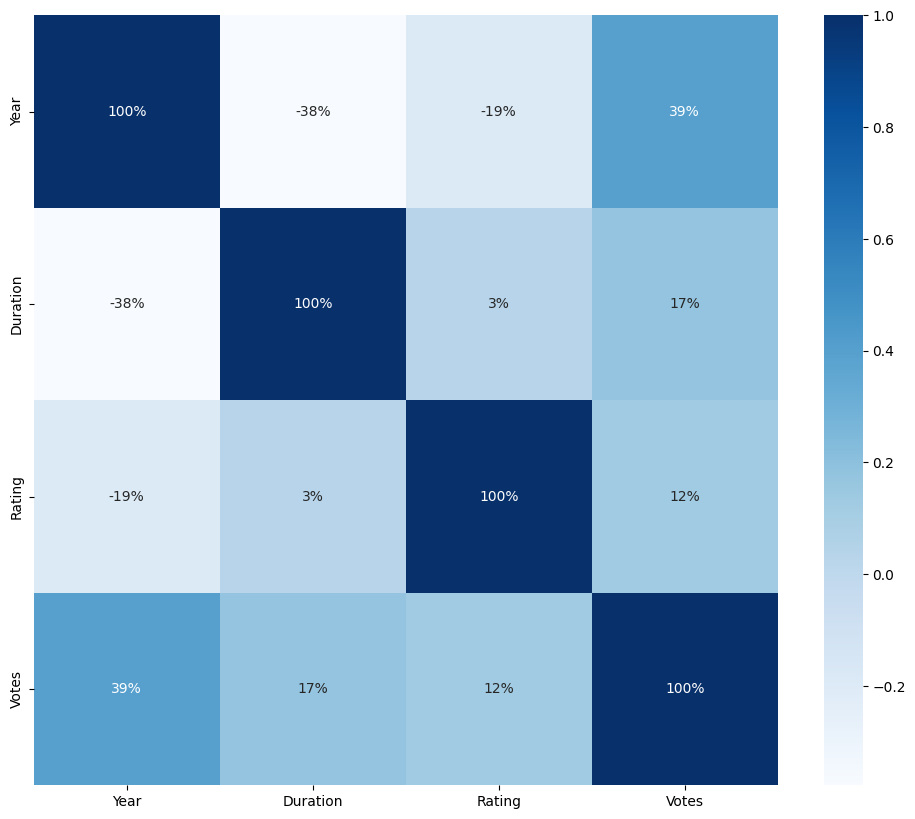

In [138]:
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(method='spearman'),annot=True,cmap="Blues", fmt='.0%')
plt.show()

In [139]:
df.drop(['Duration'],axis=1,inplace=True)
# Dropping non essential columns


Data Visualization

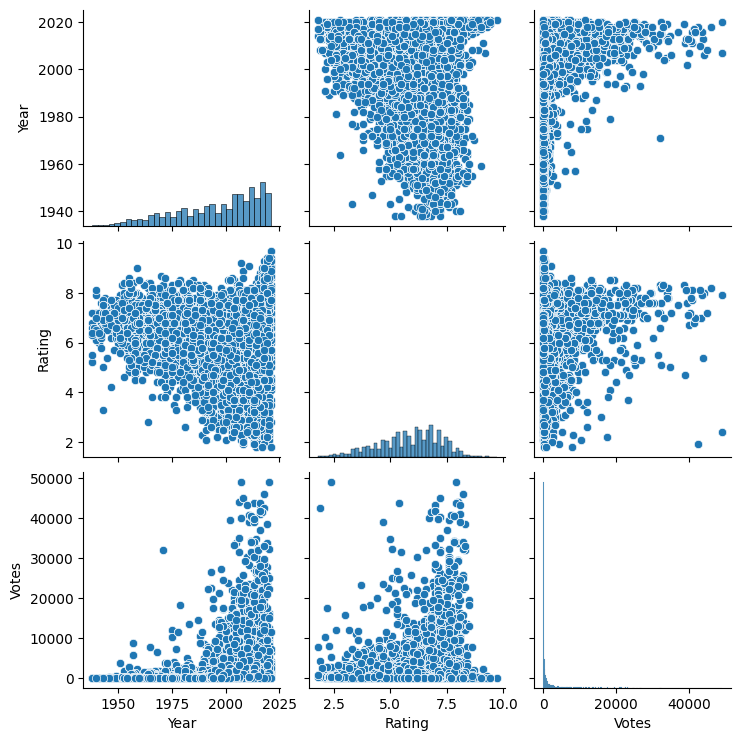

In [140]:
sns.pairplot(df)

[Text(0, 0.0, ''),
 Text(0, 50.0, ''),
 Text(0, 100.0, ''),
 Text(0, 150.0, ''),
 Text(0, 200.0, ''),
 Text(0, 250.0, ''),
 Text(0, 300.0, ''),
 Text(0, 350.0, ''),
 Text(0, 400.0, ''),
 Text(0, 450.0, '')]

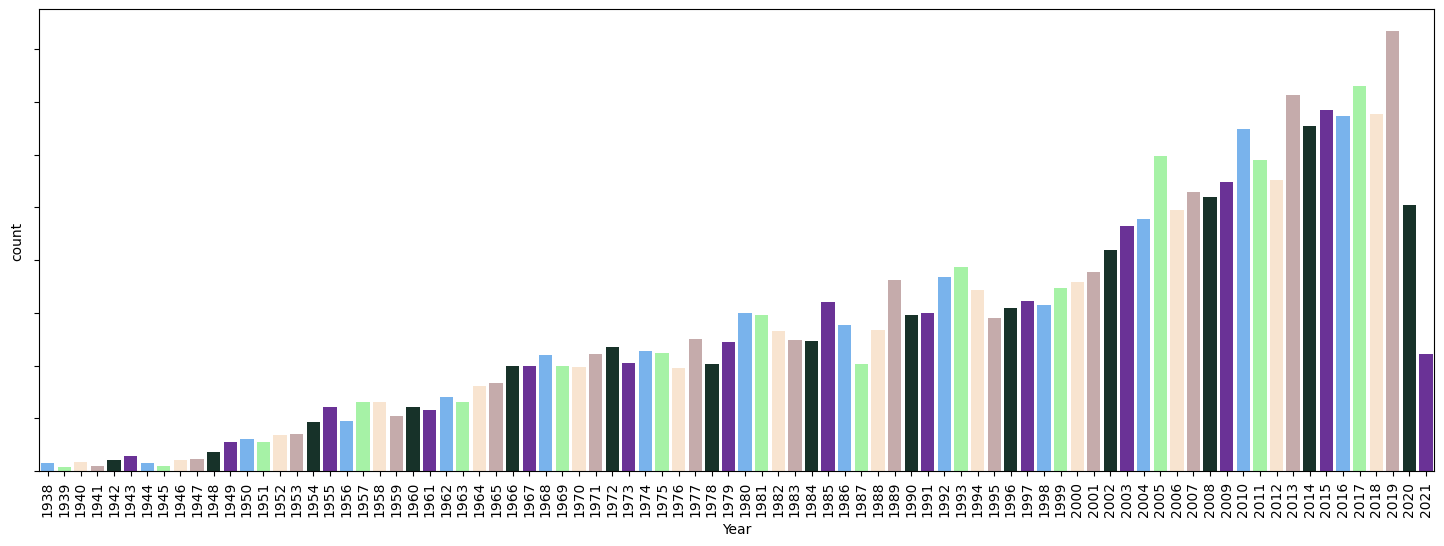

In [141]:
colors=['#66b3ff','#99ff99','#FFE4C9','#CAA6A6','#12372A','#6C22A6']
plt.figure(figsize=(18,6))
sns.countplot(x=df['Year'],palette=colors)
plt.xticks(rotation=90)
plt.gca().set_yticklabels([])

There is a huge increase in the number of films in 20's

Text(0.5, 1.0, 'Number of Movies Per Year')

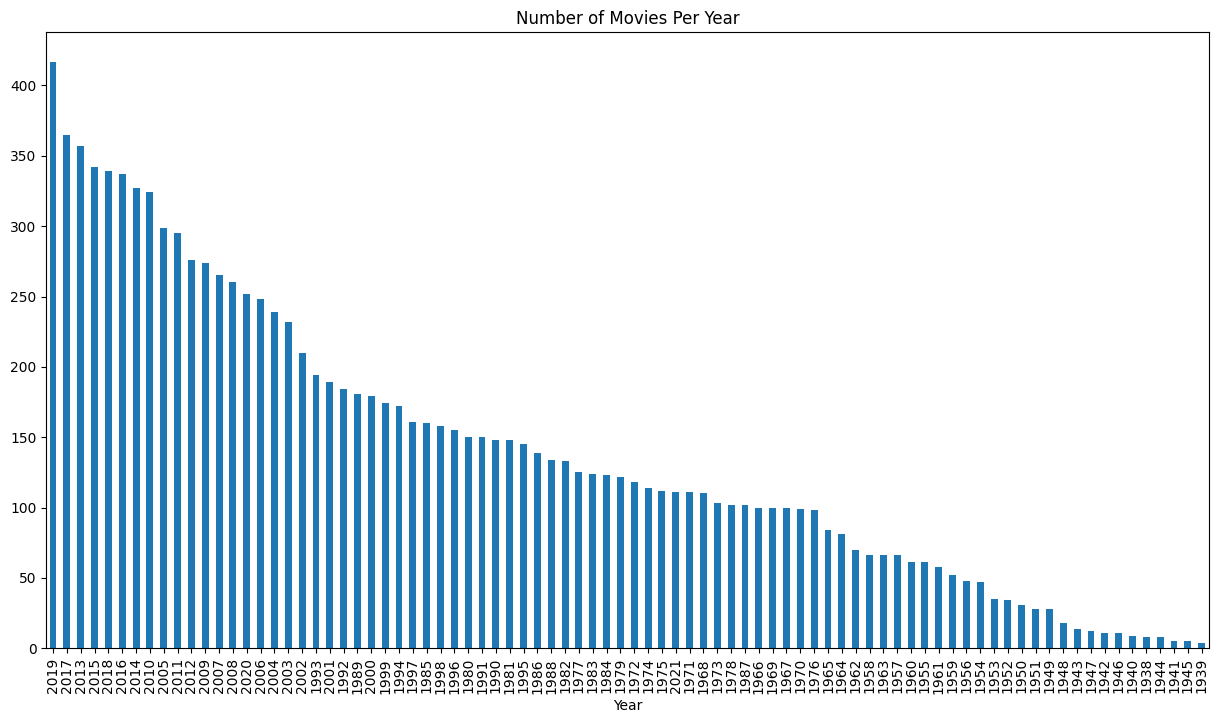

In [142]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

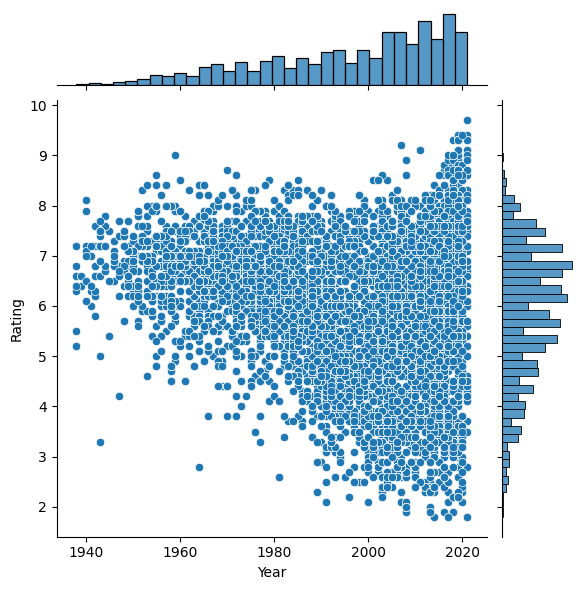

In [143]:
sns.jointplot(x=df['Year'],y=df['Rating'])

<Axes: xlabel='Year', ylabel='Rating'>

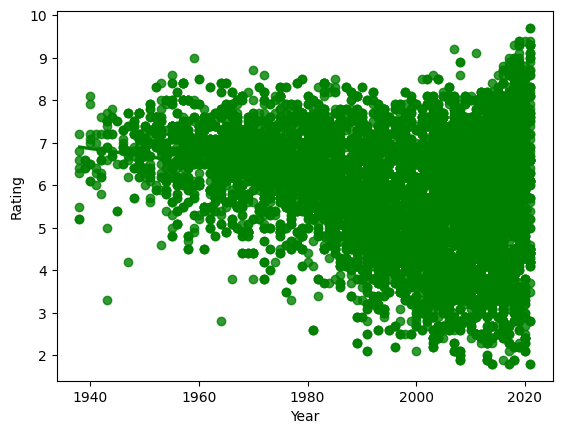

In [144]:
sns.regplot(x=df['Year'],y=df['Rating'],color='g')


<Axes: xlabel='Votes', ylabel='Rating'>

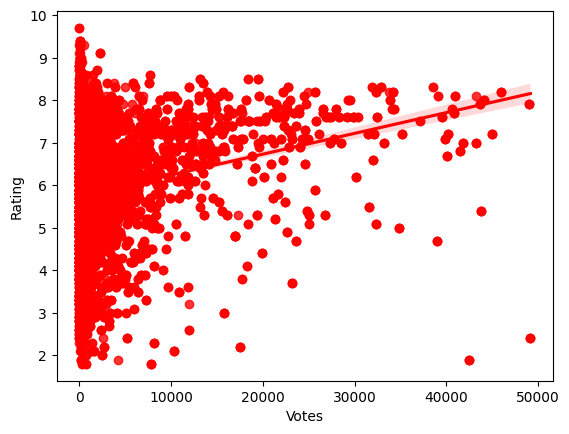

In [145]:
sns.regplot(x=df['Votes'],y=df['Rating'],color='r')

Feature Engineering-selecting,extracting relevant features from data

This calculates the mean rating for each genre group and broadcasts the result back to the original DataFrame df. So, for each row in df, the mean rating of the corresponding genre is assigned to the genre_mean_rating column.
After executing this code, genre_mean_rating will be a pandas Series with the same length as the DataFrame df, containing the mean rating for each genre group. This can be useful for tasks such as imputing missing values or creating new features based on aggregated information.

In [146]:
#grouping the columns with their average rating and then creating a new feature
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating
actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating
actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating
actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.040855,7.000000,6.850000,7.000000,7.000000
3,2019,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.729345,4.400000,5.250000,4.400000,4.460000
3,2019,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.792757,4.400000,5.250000,4.400000,4.460000
5,1997,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.729345,5.335135,4.793617,5.578378,5.930000
5,1997,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.040855,5.335135,4.793617,5.578378,5.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15503,1989,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.040855,6.290476,6.377419,5.800000,6.018750
15505,1999,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.519515,5.175000,5.311823,4.603704,5.754545
15505,1999,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,6.040855,5.175000,5.311823,4.603704,5.754545
15508,1998,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.519515,4.090625,6.045128,5.632558,5.780000


reset the index

In [147]:
df.reset_index(drop=True,inplace=True)
df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.040855,7.000000,6.850000,7.000000,7.000000
1,2019,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.729345,4.400000,5.250000,4.400000,4.460000
2,2019,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.792757,4.400000,5.250000,4.400000,4.460000
3,1997,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.729345,5.335135,4.793617,5.578378,5.930000
4,1997,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.040855,5.335135,4.793617,5.578378,5.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11702,1989,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.040855,6.290476,6.377419,5.800000,6.018750
11703,1999,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.519515,5.175000,5.311823,4.603704,5.754545
11704,1999,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,6.040855,5.175000,5.311823,4.603704,5.754545
11705,1998,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.519515,4.090625,6.045128,5.632558,5.780000


In [148]:
x = df[[ 'Year', 'Votes', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']].values
y = df['Rating'].values
x.ndim

2

Splitting training data and testing data

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[2018.        , 4831.        ,    5.62615845, ...,    6.        ,
           5.78      ,    6.925     ],
       [1980.        ,   28.        ,    5.79275684, ...,    6.52592593,
           5.81833333,    5.67435897],
       [1997.        , 1261.        ,    5.80221187, ...,    5.31182266,
           5.07659574,    5.61880342],
       ...,
       [1992.        ,  531.        ,    6.0408553 , ...,    5.93333333,
           5.87586207,    5.6       ],
       [1975.        ,   36.        ,    6.0408553 , ...,    6.30658683,
           6.99210526,    6.212     ],
       [2014.        ,   32.        ,    6.0408553 , ...,    6.68      ,
           6.77142857,    7.1       ]])

Model creation-Multiple linear regression

In [150]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([7.37394877, 4.35052475, 3.95293445, ..., 5.26902714, 5.88198152,
       4.88589524])

In [151]:
print('slope is',model.coef_)
list(zip(x,model.coef_))

slope is [-2.04032843e-03  3.61143516e-05  5.24482802e-02  4.13982010e-01
  2.01073673e-01  2.88945061e-01  3.52703686e-01]


[(array([2019.       ,    8.       ,    6.0408553,    7.       ,
            6.85     ,    7.       ,    7.       ]),
  -0.002040328432629168),
 (array([2019.        ,   35.        ,    5.72934451,    4.4       ,
            5.25      ,    4.4       ,    4.46      ]),
  3.6114351571837764e-05),
 (array([2019.        ,   35.        ,    5.79275684,    4.4       ,
            5.25      ,    4.4       ,    4.46      ]),
  0.05244828018443771),
 (array([1997.        ,  827.        ,    5.72934451,    5.33513514,
            4.79361702,    5.57837838,    5.93      ]),
  0.41398200955216197),
 (array([1997.        ,  827.        ,    6.0408553 ,    5.33513514,
            4.79361702,    5.57837838,    5.93      ]),
  0.20107367323057437),
 (array([1997.        ,  827.        ,    6.23015075,    5.33513514,
            4.79361702,    5.57837838,    5.93      ]),
  0.288945060828189),
 (array([2005.        , 1086.        ,    6.0408553 ,    7.40714286,
            5.45686275,    6.82857143,   

In [152]:
print('Constant is',model.intercept_)

Constant is 2.183011385113195


In [153]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
0,7.3,7.373949,-0.073949
1,2.4,4.350525,-1.950525
2,3.4,3.952934,-0.552934
3,7.3,6.853317,0.446683
4,6.0,5.421047,0.578953
...,...,...,...
3508,6.1,6.269234,-0.169234
3509,7.0,7.234642,-0.234642
3510,5.1,5.269027,-0.169027
3511,6.2,5.881982,0.318018


<Axes: >

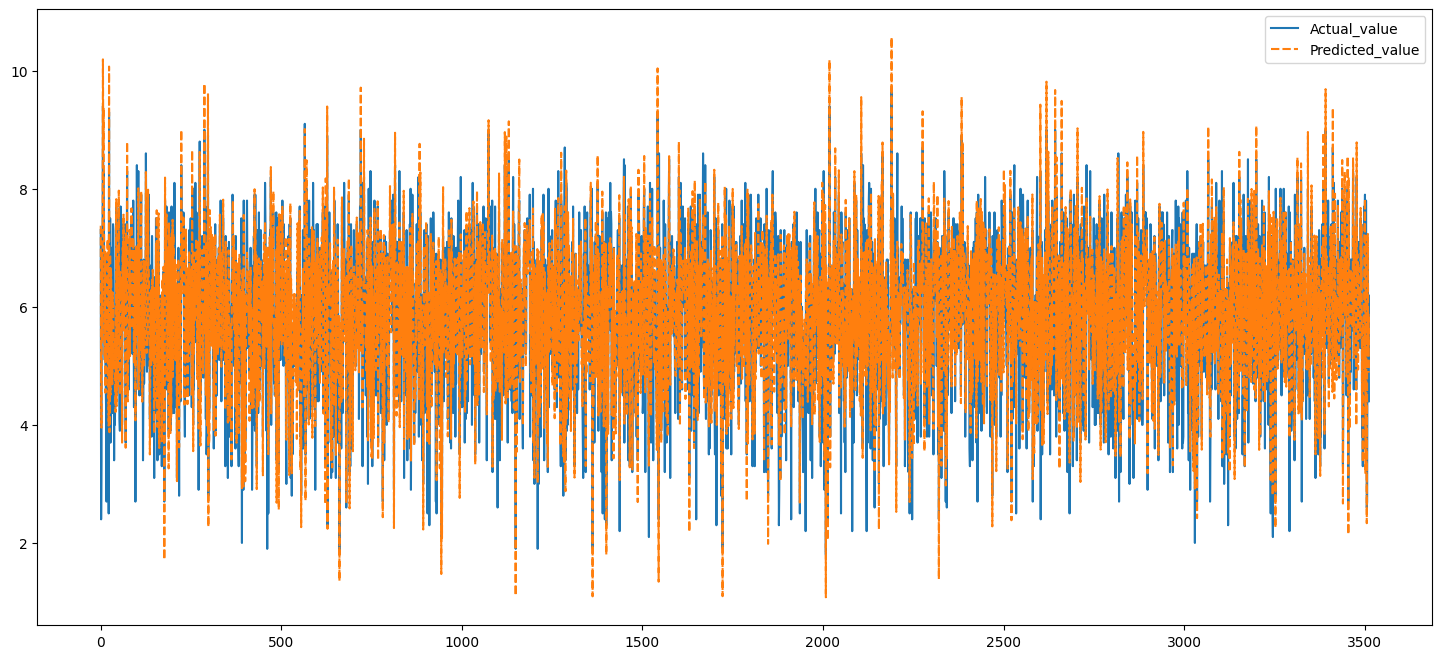

In [154]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df1[['Actual_value', 'Predicted_value']])

Text(0.5, 1.0, 'Accuracy Curve of Regression Model')

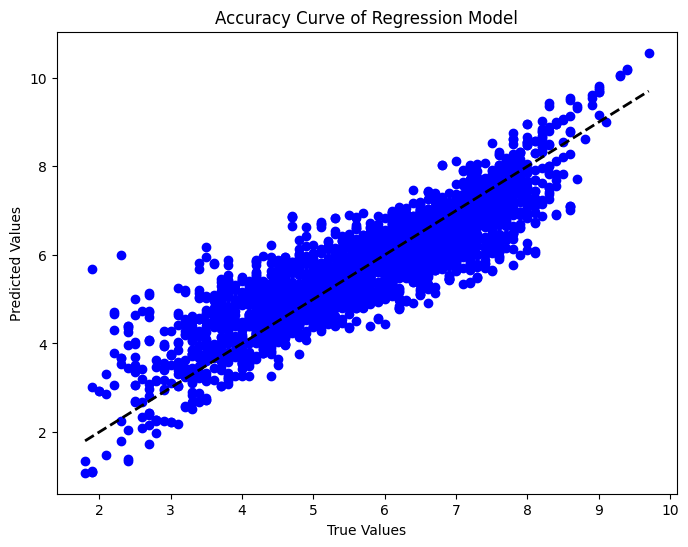

In [172]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Accuracy Curve of Regression Model')

Performance evaluation

In [156]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean squared Error is',mean_squared_error(y_test,y_pred))

Mean Absolute Error is 0.4745826061635165
Mean squared Error is 0.39998094153352104


In [157]:
from sklearn.metrics import mean_absolute_percentage_error
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred))

Percentage error is 0.09277638183594833


In [158]:
from sklearn.metrics import r2_score
r2_multiple=r2_score(y_test,y_pred)
print("R2_score is ",r2_multiple)

R2_score is  0.7837439142431486


Random Regression Model

In [159]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1

array([7.3  , 2.371, 3.478, ..., 4.88 , 6.208, 4.446])

<Axes: >

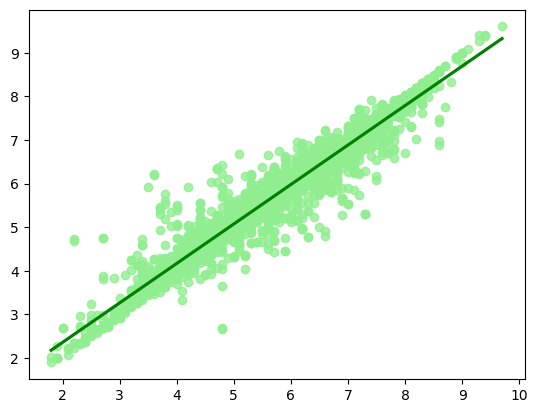

In [160]:
sns.regplot(x=y_test,y=y_pred1,color='lightgreen',line_kws={"color": "g"})

In [161]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred1))
print('Mean squared Error is',mean_squared_error(y_test,y_pred1))
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred1))
r2_random=r2_score(y_test,y_pred1)
print("R2_score is ",r2_random)

Mean Absolute Error is 0.2023273555365786
Mean squared Error is 0.12517241104469112
Percentage error is 0.03866055871288897
R2_score is  0.9323235363327831


Decision tree regression


In [162]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()

In [163]:
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array([7.3, 2.4, 3.3, ..., 5.1, 6.2, 4.4])

<Axes: >

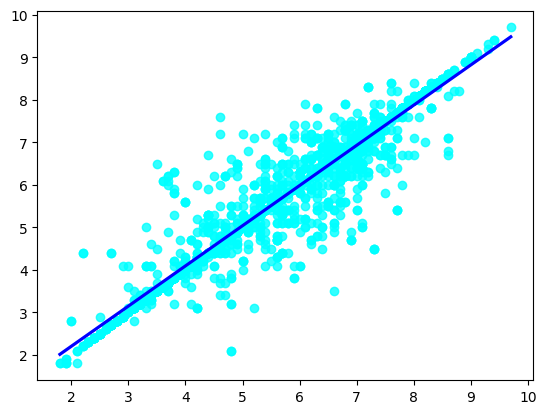

In [164]:
sns.regplot(x=y_test,y=y_pred2,color='cyan',line_kws={"color": "b"})

In [165]:
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred2))
print('Mean squared Error is',mean_squared_error(y_test,y_pred2))
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred2))
r2_decision=r2_score(y_test,y_pred2)
print("R2_score is ",r2_decision)

Mean Absolute Error is 0.15098206660973537
Mean squared Error is 0.17461998292058067
Percentage error is 0.027955907963761063
R2_score is  0.9055889166705002


Models Evaluation

In [166]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Treee':DecisionTreeRegressor()
}

r2_scores = {}
for name, model in models.items():
  model.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  r2_scores[name] = r2_score(y_test, y_predicted)

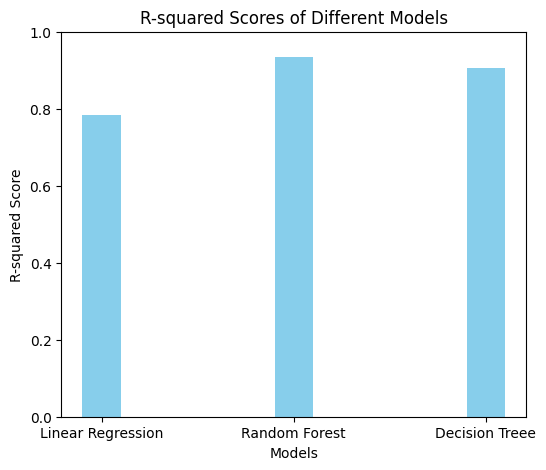

In [167]:
plt.figure(figsize=(6, 5))
plt.bar(range(len(r2_scores)), list(r2_scores.values()), align='center', color='skyblue',width=0.2)
plt.xticks(range(len(r2_scores)), list(r2_scores.keys()))
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 as R-squared ranges from 0 to 1
plt.show()

In [168]:
import joblib
import pickle
joblib.dump(model1, 'model.pkl')

['model.pkl']

Building Model

In [170]:
import ipywidgets as widgets
import joblib
import numpy as np

# Load the trained model from disk
model = joblib.load('model.pkl')

# Example mean ratings (replace with actual values or load from database)
mean_ratings = {
    'genres': {'Action': 5.519515, 'Comedy': 5.729345, 'Drama': 6.04855,'Musical':6.230151,'Romance':5.792757,'War':6.006250,'Documentry' :7.602381,'Horror':4.818905,'Mystery':5.835906,'Thriller':5.626158,'Crime':5.802212,'Fantasy':5.792199,'Family':6.308068,'Biography':6.701869,'History':6.860870,'Sport':6.381081,'Adeventure':5.91449,'Sci-Fi':5.253125,'Animation':6.0725,'News':8.0,'Western':5.7}  # Example, replace with actual data
    ,'directors': {'Gaurav Bakshi': 7.0,
 'Ovais Khan': 4.4,
 'Rahul Rawail': 5.335135135135135,
 'Shoojit Sircar': 7.4071428571428575,
 'Allyson Patel': 5.599999999999999,
 'Biju Bhaskar Nair': 4.0,
  'Madhu Ambat': 6.2,
 'Arshad Siddiqui': 7.3,
 'Partho Ghosh': 5.109375,
 'Rabi Kinagi':5.7,
 'Umesh Shukla': 5.3428571428571425,
 'Sharat Katariya': 6.875,
 'Pramod Chakravorty':6.439473684210527,
 'Ram Gopal Varma':5.6866666666666665,
 'Seshu Kmr': 6.6,
 'Vikram K. Kumar':7.3,
 'Aparna Sen':6.9624999999999995,
 'Arjun Mukerjee': 6.9,
 'Vicky Ranawat': 5.4,
 'Mani Shankar': 5.614285714285715,
 'Mohibul Haque': 3.5,
 'Sridhar Reddy': 4.5,
 'Vikram Bhatt':4.835,
 'Dharmendra Suresh Desai': 5.9,
 'Bhushan Patel':3.9285714285714284,
 'Vidhu Vinod Chopra':6.463157894736842,
 'Amrit Sagar':6.58,
 'Aziz Zee':4.0,
 'Prashant Gore': 5.5,
 'Harish Sharma':6.8,
 'Sunil Tiwari': 5.0,
 'Abhishek Varman': 5.58,
 'S. Shankar':7.2875,
 'Raj N. Sippy': 5.095348837209302,
 'Jaideep Chopra': 5.875,
 'Shivam Tiwari':6.1,
 'Jayoo Patwardhan': 7.7,
 'Mitali Ghoshal': 6.1,
 'Guddu Dhanoa': 4.68125,
 'Awtar Krishna Kaul': 6.9,
 'Vishal Mahadkar':5.0,
 'Ajai Sinha':4.15,
 'Nagesh Kukunoor': 6.8,
 'Ankush Bhatt':5.7,
 'Arjun Mukerjee': 6.9,
 'Divakar Ghodake': 4.3,
 'Shivaji Lotan Patil': 5.8,
 'Abbas Alibhai Burmawalla': 5.779245283018868,
 'Aparna Sen':6.9624999999999995,
 'Gunveen Kaur': 5.7,
 'Faruk Kabir':6.585714285714286,
 'Shyam Ramsay': 5.44390243902439,
 'Sheershak Anand': 3.875,
 'Sanjay Niranjan': 6.3,
 'Prawaal Raman': 5.591666666666666,
 'Mainak Dhar': 4.8,
 'Suhaib Ilyasi': 7.8,
 'Faisal Saif': 5.5,
 'I.S. Johar':6.53125,
 'G. Venugopal': 4.6,
 'Bharat Jain':4.2,
 'Sridhar Rangayan': 6.466666666666666,
 'Ishaan Trivedi': 3.733333333333333,
 'Raju Saigal':5.0,
 'Saurabh Varma': 5.85,
 'Dutta Madhusree': 6.2,
 'Vishal Bhardwaj': 7.042307692307692,
 'S.U. Syed':3.3499999999999996,
 'Shravankumar Tiwari': 5.3,
 'Avinash Dhyani':5.3,
 'Nagesh Kukunoor': 6.8,
 'Joe Eshwar':6.599999999999999,
 'Kushan Nandy': 6.0200000000000005,
 'Amrit Raj Thakur': 5.3,
 'Krishna D.K.':6.633333333333333,
 'Vishwesh Krishnamoorthy':7.4,
 'Sanjay Bhatia':4.8,
 'Padmakumar Narasimhamurthy': 8.1,
 'Premraaj': 6.3,
 'Konkona Sen Sharma':7.5,
 'Sekhar Suri':6.8,
 'Hemant Madhukar': 3.6,
 "Remo D'Souza":3.993333333333333,
 'Vivek Sharma': 5.2875,
 'Krishna D.K.': 6.633333333333333,
 'Dhruv Sachdev': 8.0,
 'Praveen Damle': 7.3,
 'John Mathew Matthan': 6.775,
 'Ishaan Trivedi':3.733333333333333,
 'Suneel Darshan': 4.177272727272728,
 'Vierendrra Lalit': 7.0,
 'Rishi Kapoor':5.5,
 'Ramkumar Shedge': 8.0,
 'Jehangir Surti':5.0,
 'Manmohan Desai': 6.537254901960784,
 'Hamid Ali Khan': 4.066666666666667,
 'Dipankar Senapati': 2.7,
 'Azad Jain':6.8,
 'Dheeraj Kumar': 2.4,
 'C.L. Rawal': 6.3,
 'Kshitij Sharma': 6.0,
 'Ambrish Sangal': 5.4,
 'Doondi':5.1,
 'Suman Ghosh':7.6,
 'Ashok Ahuja': 6.4,
 'Ameer Sultan': 5.400000000000001,
 'S.K. Ojha': 6.7,
 'A. Bhimsingh': 6.810344827586207,
 'Arshad Khan': 4.8999999999999995,
 'J. Om Prakash': 5.543478260869565,
 'Yash Chopra': 6.976923076923077,
 'Amit Dutta': 7.6,
 'Devendra Goel': 6.64,
 'Kannan Thamarakkulam':4.2,
 'Atma Ram':5.665,
 'Raj Kapoor':6.992000000000001,
 'K. Ravi Shankar': 5.061538461538461,
 'Kanti Shah':5.061290322580645,
 'Shibu Mitra': 5.433333333333333,
 'David Dhawan': 5.347,
 'Kanti Shah': 5.061290322580645,
 'S.R. Pratap': 3.9599999999999995,
 'Subhash Ghai': 6.194,
 'A.T. Joy':3.1,
 'Indrajit Nattoji': 5.0,
 'Yogesh Ishwar': 4.2,
 'Raja Nawathe':6.764705882352941,
 'Ashok V. Bhushan': 6.5,
 'Deepak Sareen':5.0625,
 'K. Balachander': 7.260000000000001,
 'Mahesh Bhatt':5.884705882352941,
 'Vasant Joglekar': 6.02,
 'K.C. Bokadia':4.090625,
 'K. Bapaiah': 5.464583333333334,
 'Ravi Raja Pinisetty':5.720000000000001,
 'Kundan Kumar': 4.8625,
 'Kasam Ali': 4.3,
 'Kukoo Kapoor': 3.1,
 'Narayana Rao Dasari': 5.579166666666667,
 'Babbar Subhash': 5.251851851851852,
 'Shibu Mitra':5.433333333333333,
 'Ravi Chopra': 6.055555555555555,
 'Ketan Anand': 5.483333333333333,
 'Anil Mehta': 6.2,
 'Yusuf Naqvi': 6.7,
 'Bhagyaraj': 6.44,
 'Rajiv Mehra':5.983333333333333,
 'Ashim S. Samanta': 5.4071428571428575,
 'Mangal Chakravarty': 5.0,
 'Dinesh-Ramanesh': 6.3,
 'Chetan Anand':7.011111111111112,
 'N.K. Vishwanathan': 7.3,
 'Narendra Bedi': 6.177777777777778,
 'J. Om Prakash': 5.543478260869565,
 'Govind Nihalani': 7.227777777777778,
 'Priyadarshan':6.23661971830986,
 'Manish Manikpuri': 5.4,
 'Suresh Krishna': 5.64375,
 'Chella':3.0,
 'Mrinal Sen': 7.3,
 'K. Raghavendra Rao': 5.671794871794871,
 'Raj Kumar Gupta': 6.52,
 'Suraj Prakash':5.70625,
 'Ashim S. Samanta': 5.4071428571428575,
 'Ravi Tandon': 6.716666666666666,
 'Mukul Dutt': 6.028571428571429,
 'Madhur Bhandarkar': 6.20952380952381,
 'Rajesh Ram Singh': 4.442857142857143,
 'Anil Ganguly': 6.26551724137931,
 'Gulzar':7.55,
 'Babbar Subhash':5.251851851851852,
 'Chetan Anand': 7.011111111111112,
 'David Dhawan': 5.347,
 'Fahim Irshad': 6.6,
 'David Dhawan': 5.347,
 'Vipul Amrutlal Shah': 5.511764705882353,
 'Raghunath Jhalani':6.547058823529412,
 'P. Madhavan':6.375,
 'Ravindra Peepat': 5.566666666666666,
 'Glen Barreto': 5.1,
 'Mohan Kumar':6.203571428571428,
 'J. Om Prakash': 5.543478260869565,
 'Sudhendu Roy': 6.75,
 'Dharmesh Darshan': 4.7444444444444445,
 'Mohan Kumar': 6.203571428571428,
 'Vikram Bhatt': 4.835,
 'Ambrish Sangal': 5.4,
 'Harmesh Malhotra': 5.553846153846154,
 'Anubhav Sinha': 5.433333333333334,
 'Shakti Samanta': 6.718571428571429,
 'Ketan Mehta': 6.814285714285715,
 'Prakash Jha': 6.696153846153846,
 'Atma Ram': 5.665,
 'Guru Dutt': 7.377777777777778,
 'Phani Majumdar': 6.9,
 'Balasekaran': 4.6,
 "Lawrence D'Souza": 4.845454545454545,
 'M.V. Raman': 5.70909090909091,
 'Nagesh Kukunoor': 6.8,
 'Indra Kumar': 5.246153846153846,
 'Aditya Datt':5.123076923076923,
 'J. Om Prakash':5.543478260869565,
 'Mahesh Bhatt': 5.884705882352941,
 'Mohit Suri':6.167647058823529,
 'Shankhadeep':3.7,
 'Hrishikesh Mukherjee': 7.313846153846153,
 'Sriparna Dey': 6.1,
 'Sudipto Sen': 5.2,
 'Tony Juneja':4.05,
 'Khwaja Ahmad Abbas': 6.57391304347826,
 'Pankaj Parashar': 5.733333333333333,
 'Mehul Kumar': 5.38,
 'Satyen Bose': 6.929729729729729,
 'Prem Lalwani':4.05,
 'Dilip Shankar': 5.2,
 'Ramana': 3.8000000000000003,
 'Ambrish Sangal': 5.4,
 'Sanjay Gupta': 5.575,
 'Deepak Ramsay': 4.4,
 'Suparn Varma':4.833333333333333,
 'E.V.V. Satyanarayana': 6.35,
 'Basu Bhattacharya': 7.177777777777779,
 'Zia Sarhadi':6.82,
 'Mohammed Hussain':6.18,
 'Deepak Balraj Vij':5.423529411764706,
 'Raghunath Jhalani': 6.547058823529412,
 'Prashant Chadha': 3.25,
 'Sachin Pilgaonkar': 5.475,
 'Pankaj Parashar': 5.733333333333333,
 'Amar Kumar':7.0,
 'Deepak Tanwar': 4.0,
 'Harish Shah': 5.62,
 'Shimit Amin': 7.68,
 'Ejaz Gulab':5.8,
 'Rakesh Nahata': 4.0,
 'Anil Sharma':5.635483870967741,
 'Rajesh Kumar Singh': 3.2,
 "Remo D'Souza": 3.993333333333333,
 'Sanjay Khan':6.12,
 'Ramanlal Desai': 4.8,
 'Annu Kapoor': 7.0,
 'Roshan Taneja': 5.400000000000001,
 'Amit Bose': 6.8,
 'Hrishikesh Mukherjee': 7.313846153846153,
 'Priyadarshan': 6.23661971830986,
 'Tony Juneja': 4.05,
 'Subodh Mukherji': 6.640000000000001,
 'Hiren Nag':6.288888888888889,
 'Mahesh Nair':4.0,
 'Gulzar': 7.55,
 'Naresh Malhotra': 4.7272727272727275,
 'Suparn Varma': 4.833333333333333,
 'Sundar C.':5.17,
 'Prabhu Deva': 4.720833333333333,
 'Vipul Amrutlal Shah': 5.511764705882353,
 'Tanvir Ahmad':3.6,
 'Kalidas':6.111764705882353,
 'Narendra Bedi': 6.177777777777778,
 'Nanabhai Bhatt': 5.935294117647058,
 'Mohan Segal':6.7749999999999995,
 'Ravi Raja': 5.4,
 'Vimal Reddy': 4.7,
 'V.V. Vinayak': 6.8,
 'G.V. Iyer': 7.3,
 'G.P. Sippy': 6.288888888888889,
 'S.P. Muthuraman': 6.29047619047619,
 'Sandeep Chatterjee': 3.2999999999999994,
 'S.P. Muthuraman':6.29047619047619,
 'Manoj Palrecha':6.6,
 'Homi Wadia':5.90625,
 'Latif Faiziyev': 5.96,
 'Babbar Subhash': 5.251851851851852,
 'Karan Johar': 5.6875,
 'Vikram Bhatt': 4.835,
 'Guddu Dhanoa': 4.68125,
 'Deepak Balraj Vij': 5.423529411764706,
 'Brij': 6.857142857142857,
 'B.R. Chopra': 7.052941176470589,
 'J. Om Prakash': 5.543478260869565,
 'M.R. Shahjahan': 5.36,
 'Chetan Anand':7.011111111111112,
 'Ajay Govind':6.3,
 'Lekh Tandon': 6.8047619047619055,
 'A.P. Subbaraav': 6.599999999999999,
 'Deepak Bahry': 4.503448275862069,
 'Sriram Raghavan': 6.9750000000000005,
 'Govind Nihalani': 7.227777777777778,
 'J. Om Prakash': 5.543478260869565,
 'Raju Chouhan': 3.1,
 'Abbas Alibhai Burmawalla': 5.779245283018868,
 'Mukul Anand':6.17,
 'Karan Malhotra': 6.7,
 'Anand P. Raju': 7.8,
 'Kamal Majumdar': 6.0,
 'Partho Ghosh': 5.109375,
 'Ketan Anand': 5.483333333333333,
 'Vijay Reddy': 5.260000000000001,
 'Arjun Sajnani': 4.6,
 'Anil Ganguly': 6.26551724137931,
 'Ram Gopal Varma': 5.6866666666666665,
 'Nikhil Pherwani': 7.2,
 'Ashim S. Samanta': 5.4071428571428575,
 'Chand':5.1571428571428575,
 'Esmayeel Shroff': 5.39375,
 'Shivam Nair':6.35,
 'Biswajeet Bora':6.6,
 'Rajshree Ojha':5.0,
 'Sachin Pilgaonkar':5.475,
 'Abdul Qayyoom Khan':4.1,
 'Mukul Anand':6.17,
 'Abbas Alibhai Burmawalla': 5.779245283018868,
 'Neeraj Pandey': 6.6000000000000005,
 'Sanjay Gadhvi': 5.5058823529411764,
 'Rajkumar Santoshi':6.723529411764706,
 'Rishi Prakash Mishra': 5.8,
 'Shakti Samanta': 6.718571428571429,
 'Suneel Darshan': 4.177272727272728,
 'Neeraj Ghaywan': 7.025,
 'Devashish Makhija': 6.925000000000001,
 'Abbas Alibhai Burmawalla': 5.779245283018868,
 'Shashi Kapoor': 5.3,
 'Raam Shetty': 4.628571428571428,
 'Vikramaditya Motwane': 7.4,
 'Luv Ranjan': 7.12,
 'Phani Majumdar': 6.9,
 'Ramesh Sippy': 6.045833333333333,
 'N.T. Rama Rao':7.7,
 'Mansoor Khan': 7.2700000000000005,
 'Vinod Pande': 4.1125,
 'Harmesh Malhotra': 5.553846153846154,
 'Sudesh Issar': 6.1000000000000005,
 'Rakeysh Omprakash Mehra': 5.425,
 'Ananth Narayan Mahadevan':5.480769230769231,
 'Hrishikesh Mukherjee': 7.313846153846153,
 'Homi Wadia': 5.90625,
 'Sujoy Ghosh': 6.015384615384615,
 'Shakti Samanta': 6.718571428571429,
 'Ashu Trikha':4.361538461538461,
 'Uttar Kumar': 6.9,
 'Nanubhoy Vakil': 6.8,
 'I.V. Sasi': 6.513333333333334,
 'Deepak Sareen': 5.0625,
 'Master Bhagwan': 6.5,
 'Saeed Akhtar Mirza':7.011111111111111,
 'Soumitra Ranade': 5.725,
 'Irene Zoe Alameda': 5.9,
 'Homi Wadia': 5.90625,
 'Kedar Kapoor': 6.4,
 'Zaigham Imam': 6.75,
 'K. Amarnath': 6.11,
 'Hansal Mehta': 6.283333333333333,
 'Umesh Shukla': 5.3428571428571425,
 'Akhil Gautam': 7.9,
 'Mohan Kumar': 6.203571428571428,
 'Rohit Shetty': 5.720588235294118,
 'Faruk Kabir':6.585714285714286,
 'Ravindra Arora': 4.3,
 'Ketan Desai':5.3428571428571425,
 'Bhushan Patel': 3.9285714285714284,
 'Roshan Abbas': 4.0,
 'Raj N. Sippy': 5.095348837209302,
 'Kader Kashmiri': 4.725,
 'Shakti Samanta': 6.718571428571429,
 'Mehboob Khan': 7.0346153846153845,
 'T. Prakash Rao': 6.568181818181818,
 'Tanveer Hashmi':3.45,
 'Prabhu': 6.5,
 'Harmesh Malhotra': 5.553846153846154,
 'Manmohan Desai': 6.537254901960784,
 'Bhushan Patel': 3.9285714285714284,
 'Mohan Kumar': 6.203571428571428,
 'Jayant Desai': 7.085714285714286,
 'Apurv Bajpai': 4.4,
 'Piyush Dinker Pandya': 6.599999999999999,
 'Mohan Kumar': 6.203571428571428,
 'Harmesh Malhotra':5.553846153846154,
 'Ajay Bhuyan': 5.400000000000001,
 'Jiten':6.2,
 'C.H. Balaji Singh Babu': 5.599999999999999,
 'Narayan Chauhan': 8.1,
 'Lekh Tandon': 6.8047619047619055,
 'Mohan Kumar': 6.203571428571428,
 'Shonali Bose': 7.425,
 'Shakti Samanta': 6.718571428571429,
 'Khushboo Ranka': 8.7,
 'Avinash Das':5.433333333333334,
 'Raghunath Jhalani':6.547058823529412,
 'Hemen Gupta':7.2,
 'Shakti Samanta':6.718571428571429,
 'K. Muralimohana Rao':4.516666666666667,
 'Asit Sen': 7.125,
 'Kuku Kohli':5.175,
 'Nandlal Jaswantlal':6.8625,
 'Deepa Mehta': 6.911111111111111,
 'Raj Kanwar': 5.064705882352941,
 'Mehboob Khan': 7.0346153846153845,
 'Ramesh Sippy':6.045833333333333,
 'David Dhawan': 5.347,
 'Shakti Samanta':6.718571428571429,
 'Major Sundarrajan': 6.8,
 'Rama Rao Tatineni': 5.318518518518518,
 'Shyam Ramsay': 5.44390243902439,
 'Dada Kondke':6.8,
 'Buddhadev Dasgupta': 5.971428571428572,
 'Aziz Sejawal':4.863636363636363,
 'Shashilal K. Nair': 5.50625,
 'Anil Ganguly': 6.26551724137931,
 'Mahesh Bhatt': 5.884705882352941,
 'Ganesh Acharya': 4.96,
 'Gulzar':7.55,
 'Kanti Shah':5.061290322580645,
 'Ravi Raja Pinisetty': 5.720000000000001,
 'Homi Adajania': 6.325,
 'Pan Nalin':7.166666666666667,
 'Vijay Bhatt': 6.808333333333334,
 'Khwaja Ahmad Abbas': 6.57391304347826,
 'Ravi Tandon': 6.716666666666666,
 'Raj Khosla':6.716279069767442,
 'T. Hariharan': 5.3,
 'Rahul Rawail': 5.335135135135135,
 'Mohan Kumar':6.203571428571428,
 'Siddharth Anand':5.966666666666666,
 'Harryy W. Fernaandes': 3.9,
 'Babubhai Mistry': 6.535555555555556,
 'N. Maharajan': 4.3999999999999995,
 'Parasuram':4.8,
 'Amol Palekar': 6.781818181818181,
 'Vikram Bhatt':4.835,
 'Ramanand Sagar': 6.764285714285714,
 'Rajat Kapoor':6.852941176470588,
 'Ashim S. Samanta': 5.4071428571428575,
 'Sohail Tatari': 6.166666666666667,
 'Shyam Benegal': 7.1875,
 'N. Chandra':6.5760000000000005,
 'Ketan Desai': 5.3428571428571425,
 'Mehboob Khan': 7.0346153846153845,
 'Geethapriya': 7.0,
 'Satyen Bose': 6.929729729729729,
 'Shashank Udapurkar': 4.9,
 'K. Thankappan':7.1,
 'Suresh Krishna': 5.64375,
 'Jugal Kishore': 5.5636363636363635,
 'Mukesh Sharma': 6.3,
 'Mehul Kumar':5.38,
 'Jagannath Chatterjee': 6.3,
 'Tapan Sinha':7.45,
 'Jaswinder Chahal': 6.6,
 'Mehboob Khan': 7.0346153846153845,
 'Kundan Kumar': 4.8625,
 'Asit Sen': 7.125,
 'Mohan Kumar': 6.203571428571428,
 'Rajan Johri': 6.3,
 'Satyen Bose':6.929729729729729,
 'Sushil Rajpal': 7.3,
 'Shyam Benegal': 7.1875,
 'Shoib Nikash Shah': 7.1 },  #  replaced with actual data
      'actors': {'Rasika Dugal': 6.85,'Prateik': 5.25, 'Bobby Deo':4.793617021276596,
 'Jimmy Sheirgill': 5.456862745098039, 'Naseem Banu':6.400000000000001, 'Sanjay Mishra': 6.992307692307692,
 'Anuraag': 5.5, 'Feroz Khan':5.80576923076923, 'Priyanka Chopra Jonas': 5.845,
 'Manisha Koirala': 4.913636363636363, 'Sumit Arora': 6.3, 'Hrithik Roshan': 6.048076923076923,
 'Saroja Devi B.': 6.075,'Prem Nath':6.1899999999999995,
 'Ankit Desai':7.0, 'Vicky Ahuja': 4.6571428571428575,'Zareen Khan':4.05,
 'Jaya Bachchan': 5.6, 'Mithun Chakraborty':5.331182795698925,
 'Jalal Agha': 6.025,'Shakila':6.25,'Urmila Bhatt': 6.7,
 'Neelima Azim': 6.5, 'Shatrughan Sinha': 5.342553191489362,
 'Jayaram': 4.2,
 'Nimmi': 6.233333333333333,
 'Vineet Kumar Singh':7.9,
 'Dolly Ahluwalia': 6.2,'Ajit':5.881,
 'Jayam Ravi': 5.400000000000001,
 'Amol Palekar': 7.040909090909091,
 'Sanjeev Kumar': 6.5927927927927925,'Shammi Kapoor': 6.890000000000001,
 'Anil Kapoor': 5.667692307692307, 'Sadhana': 7.15,
 'Rajan Sippy': 5.15, 'Prabhas': 3.2999999999999994, 'Mohanlal':7.08,
 'Madhuri Dixit': 6.095833333333334,'Akshay Kapoor': 3.9,
 'Vikas Balian': 6.9, 'Jimmy Sheirgill':5.456862745098039,
 'Tiger Shroff': 3.25,'Aishwarya Rai Bachan':4.79,
 'Nazima': 7.0,
 'Sapna Sappu': 4.957142857142857, 'Ranbir Kapoor':6.317142857142857,
 'Ajay Kumar Singh':5.8,
 'Rajesh Khanna':6.575280898876405,
 'Sunny Deol': 5.018518518518518,
 'Feroz Khan': 5.80576923076923,
 'Ajith Kumar': 4.699999999999999, 'Jayalalitha J': 7.1,
 'Rajinikanth': 6.145283018867924,
 'Kay Kay Menon': 6.7727272727272725,
 'Jeetendra':5.411229946524064}  #  replaced with actual data
}

# Define input fields
input_fields = {
    'Year': widgets.Text(value='', description='Year:'),
    'Votes': widgets.Text(value='', description='Votes:'),
    'Genre_mean_rating': widgets.Text(value='', description='Genre:'),
    'Director': widgets.Text(value='', description='Director:'),
    'Actor1': widgets.Text(value='', description='Actor1:'),
    'Actor2': widgets.Text(value='', description='Actor2:'),
    'Actor3': widgets.Text(value='', description='Actor3:')
}

# Function to handle user input and make predictions
def make_predictions(sender):
    # Get user input from input fields
    year = float(input_fields['Year'].value)
    votes = float(input_fields['Votes'].value)
    genre = input_fields['Genre_mean_rating'].value
    director_name = input_fields['Director'].value
    actor1_name = input_fields['Actor1'].value
    actor2_name = input_fields['Actor2'].value
    actor3_name = input_fields['Actor3'].value

    # Get mean ratings
    genre_mean = mean_ratings['genres'].get(genre, 0)  # Default to 0 if genre not found
    director_mean = mean_ratings['directors'].get(director_name, 0)  # Default to 0 if director not found
    actor1_mean = mean_ratings['actors'].get(actor1_name, 0)  # Default to 0 if actor1 not found
    actor2_mean = mean_ratings['actors'].get(actor2_name, 0)  # Default to 0 if actor2 not found
    actor3_mean = mean_ratings['actors'].get(actor3_name, 0)  # Default to 0 if actor3 not found

    # Prepare the input for the model
    user_input = [year, votes, genre_mean, director_mean, actor1_mean, actor2_mean, actor3_mean]
    user_input = np.array(user_input).reshape(1, -1)

    # Make predictions
    prediction = model.predict(user_input)

    # Display prediction
    print('Prediction:', prediction)

# Create a button for making predictions
predict_button = widgets.Button(description='Predict')
predict_button.on_click(make_predictions)

# Display input fields and button
input_widgets = widgets.VBox(list(input_fields.values()))
display(input_widgets, predict_button)



Button(description='Predict', style=ButtonStyle())

Prediction: [5.137]
